In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a Robot Simulator in 2D

In [ ]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [ ]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [ ]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:

    kx = 1
    ky = 1
    ux = kx * (3 - y[0])
    uy = ky * (3 - y[1])


    return array([ux, uy])

### Running the simulator

In [ ]:
# final time to be a multiple of 2*pi for 8 curve
tf = 10
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# tf = 3.
# Δt = 0.1    # Time step
# time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# initial condition
x = array([1., 2.])


x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

circuler motion

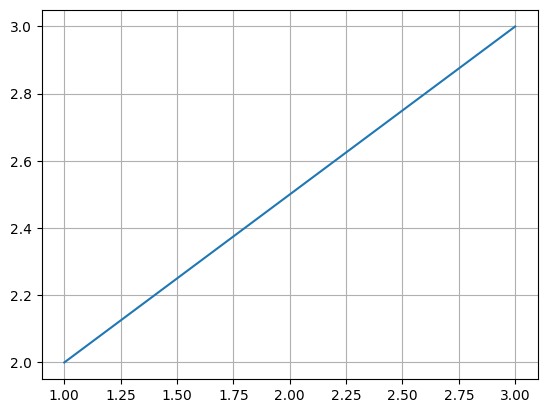

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1])

In [ ]:
!pip install JSAnimation


  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11405 sha256=817a34b999788653985ccebc90f760da2406807e7d1fde2be7d757883f7cddf8
  Stored in directory: /root/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


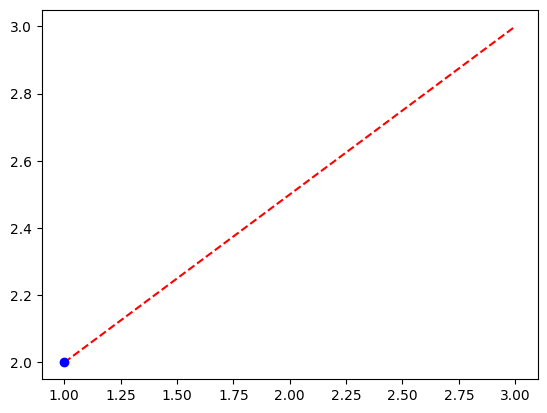

In [ ]:


import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')

    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')



anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())